In [ ]:

import zipfile
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files



In [ ]:
!apt-get install wget


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install tensorflow tensorflow-datasets


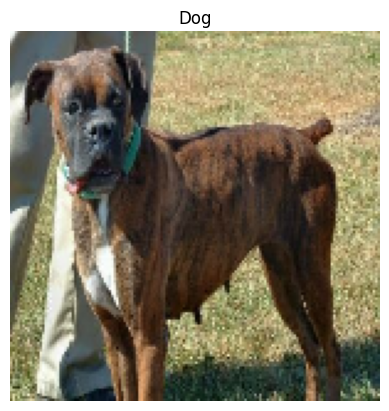

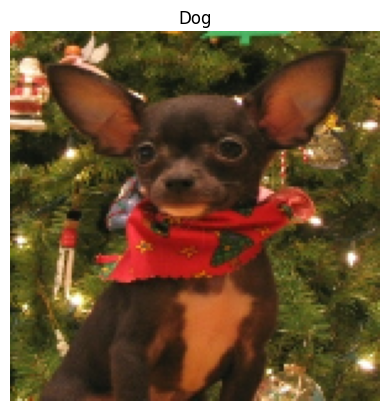

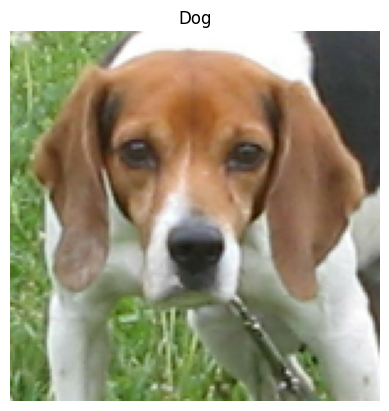

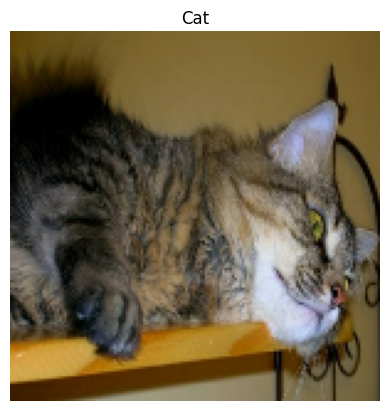

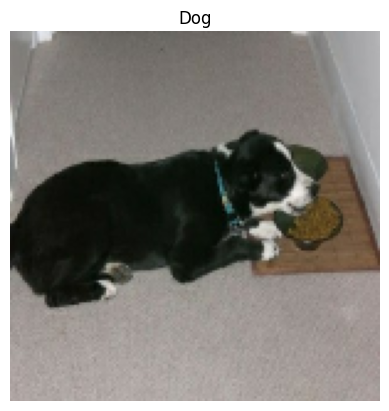

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


train_data = dataset['train']


def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize the image
    image = image / 255.0  # Normalize the image to [0, 1]
    return image, label


train_data = train_data.map(preprocess_image)


for image, label in train_data.take(5):
    plt.imshow(image.numpy())
    plt.title('Cat' if label.numpy() == 0 else 'Dog')
    plt.axis('off')
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),


    layers.Dense(512, activation='relu'),


    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

train_size = int(0.8 * len(list(train_data)))  # 80% for training
val_size = len(list(train_data)) - train_size  # Remaining 20% for validation


train_data = train_data.take(train_size)
val_data = train_data.skip(train_size)


train_data = train_data.batch(32)
val_data = val_data.batch(32)


In [ ]:

history = model.fit(
    train_data,
    epochs=2,
    validation_data=val_data
)


Epoch 1/2
582/582 ━━━━━━━━━━━━━━━━━━━━ 1043s 2s/step - accuracy: 0.7907 - loss: 0.4472
Epoch 2/2
582/582 ━━━━━━━━━━━━━━━━━━━━ 1053s 2s/step - accuracy: 0.8373 - loss: 0.3620


In [ ]:
model.compile(
    optimizer='adam',  # or any other optimizer
    loss='binary_crossentropy',  # For binary classification (cats vs. dogs)
    metrics=['accuracy']  # Make sure accuracy is being tracked
)


In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss'])


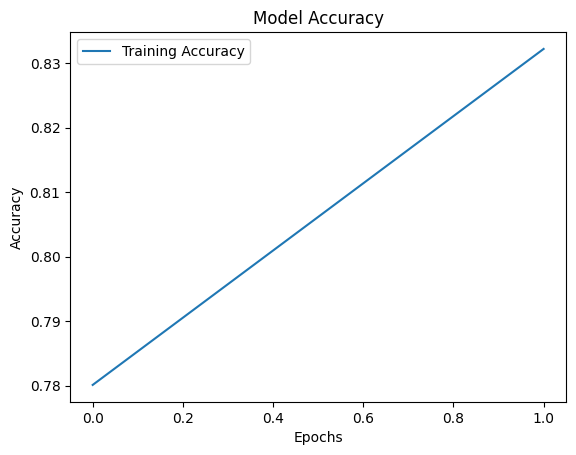

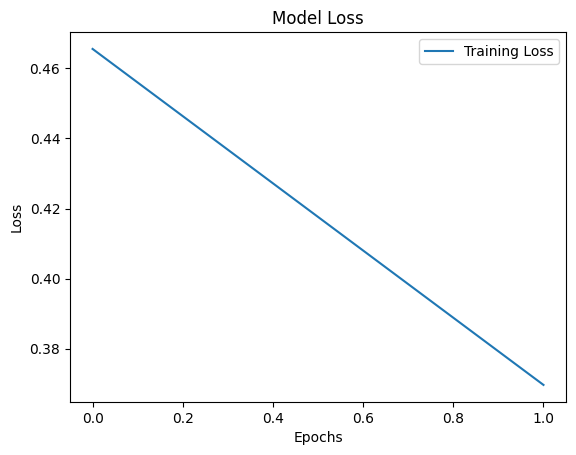

In [ ]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

predictions = model.predict(train_data)


print(predictions[:5])  # Adjust based on your data


582/582 ━━━━━━━━━━━━━━━━━━━━ 292s 502ms/step
[[0.99208313]
 [0.994587  ]
 [0.968805  ]
 [0.01657907]
 [0.34505528]]


In [65]:


model.save('my_model.keras')



In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop


model = load_model('my_model.keras', compile=False)


model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


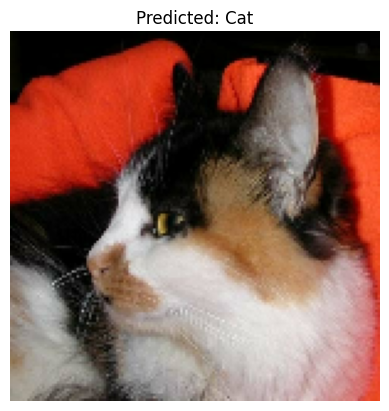

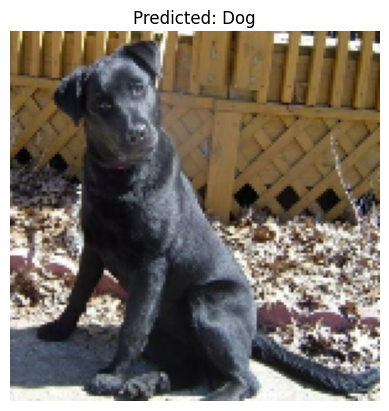

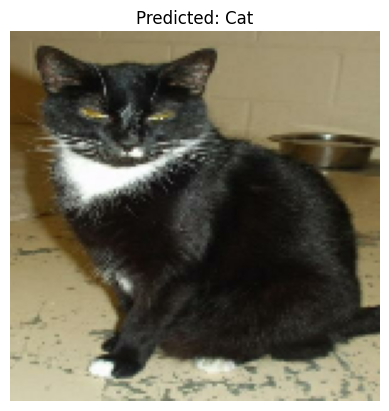

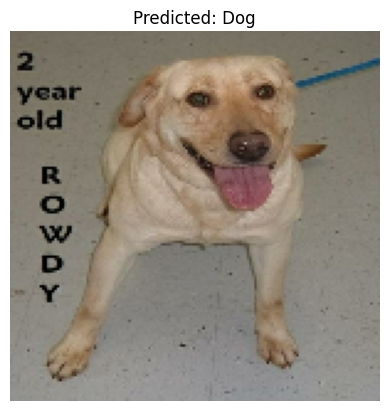

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


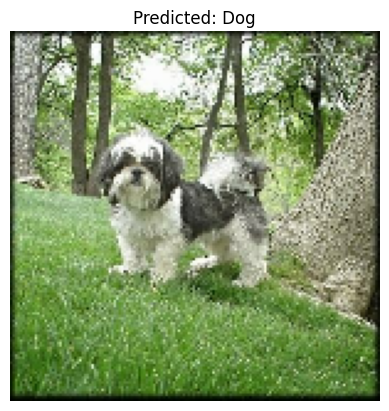

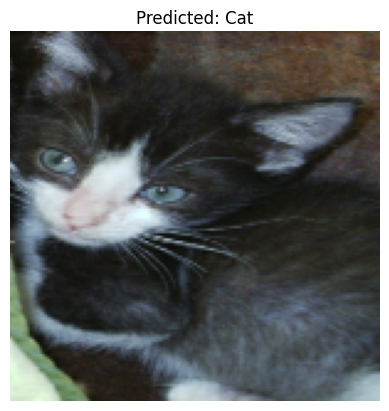

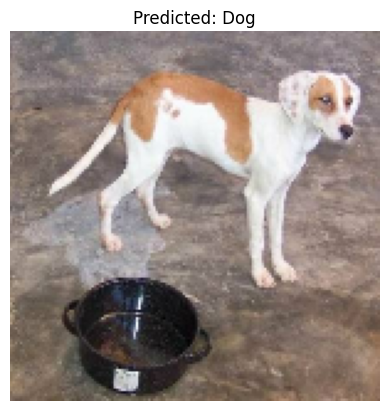

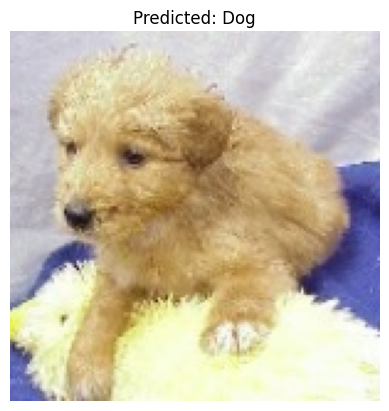

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


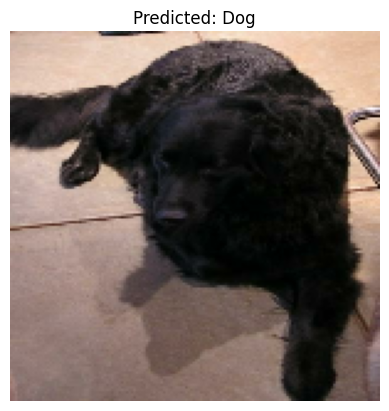

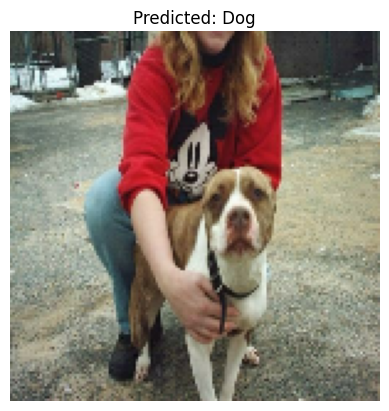

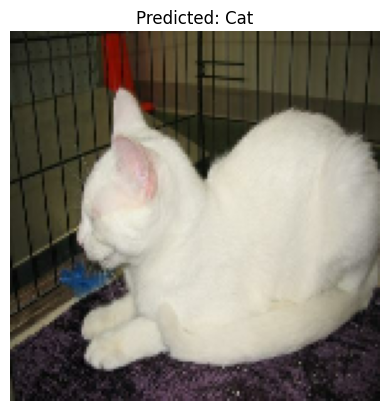

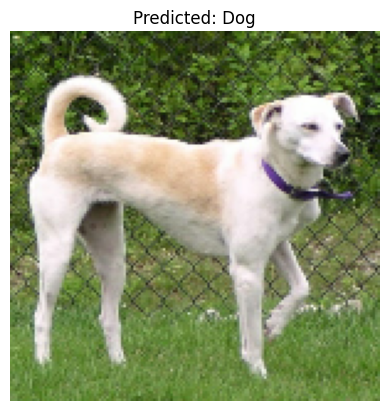

In [70]:


from tensorflow.keras.models import load_model
model = load_model('my_model.keras')


import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


train_data = dataset['train']


def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize the image
    image = image / 255.0  # Normalize the image to [0, 1]
    return image, label


train_data = train_data.map(preprocess_image)


train_data = train_data.batch(32)


batches_to_train = []
for i, (image, label) in enumerate(train_data.take(4)):
    if i >= 1:
        batches_to_train.append((image, label))


for batch in batches_to_train:
    image, label = batch


    predictions = model.predict(image)


    for i in range(4):  # Show 4 images
        plt.imshow(image[i].numpy())
        plt.title('Predicted: ' + ('Dog' if predictions[i] > 0.5 else 'Cat'))
        plt.axis('off')
        plt.show()
